In [27]:
# OpenPOM analysis imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from numpy.linalg import norm

In [28]:
def explicit_H_filter(smiles: str) -> bool:
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetNumExplicitHs() > 1:
            return False  
    return True

In [29]:
df = pd.read_csv("openpomdata.csv").drop("descriptors",axis=1)

df =  df[df['odorless'] == False]
df = df[df["nonStereoSMILES"].apply(explicit_H_filter)].copy()  
df = df.reset_index(drop=True)
scent_matrix = df[df.keys()[1:]].to_numpy()

vanilla_idx = list(df.keys()[1:]).index("vanilla")  

# compute Pearson correlation between vanilla and every other scent
vanilla_col = scent_matrix[:, vanilla_idx]
corrs = np.array([np.corrcoef(vanilla_col, scent_matrix[:, i])[0,1] for i in range(138)])
vanilla_corr_vec = np.nan_to_num(corrs)  # shape: (138,), with NaNs replaced by 0




def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (norm(v1) * norm(v2) + 1e-8)

def compute_reward(mol_vec):
    return cosine_similarity(mol_vec, vanilla_corr_vec)

scent_cols = df.columns[1:]
df["reward"]= df[scent_cols].apply(compute_reward, axis=1)

# Normalize to [0.1, 1.0] range (or any positive range you like)
min_r = df["reward"].min()
max_r = df["reward"].max()

# Avoid zero reward
scaled_rewards = 0.1 + 0.9 * (df["reward"] - min_r) / (max_r - min_r)
df["shift_reward"] = scaled_rewards

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\paulj\Desktop\Master\venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [30]:
df = pd.read_csv("openpomdata.csv").drop("descriptors",axis=1)
len(df)

4983

In [31]:

df =  df[df['odorless'] == False]
df = df[df["nonStereoSMILES"].apply(explicit_H_filter)].copy()  
df = df.reset_index(drop=True)
df.head()

,nonStereoSMILES,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,apricot,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [32]:
scent_matrix = df[df.keys()[1:]].to_numpy()

vanilla_idx = list(df.keys()[1:]).index("vanilla")  

# compute Pearson correlation between vanilla and every other scent
vanilla_col = scent_matrix[:, vanilla_idx]
corrs = np.array([np.corrcoef(vanilla_col, scent_matrix[:, i])[0,1] for i in range(138)])
vanilla_corr_vec = np.nan_to_num(corrs)  # shape: (138,), with NaNs replaced by 0

c:\Users\paulj\Desktop\Master\venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\paulj\Desktop\Master\venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


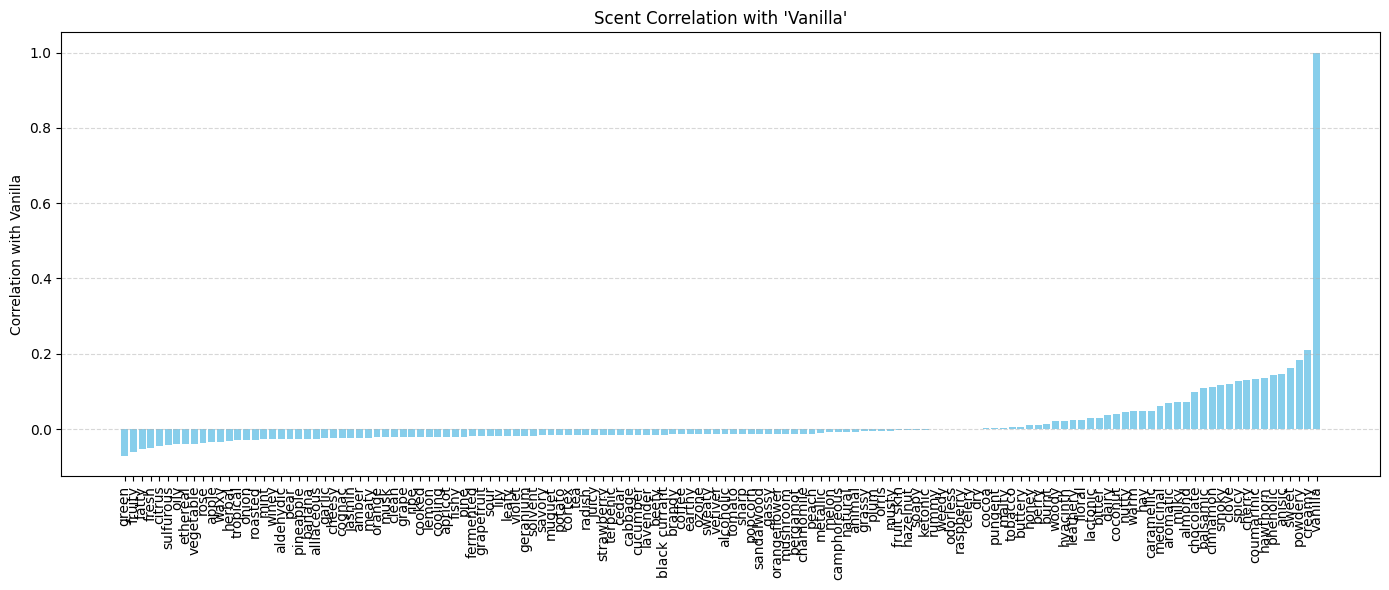

In [33]:
# Sort by correlation
sorted_indices = np.argsort(vanilla_corr_vec)
sorted_corrs = vanilla_corr_vec[sorted_indices]
sorted_labels = np.array(df.keys()[1:])[sorted_indices]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(range(len(sorted_corrs)), sorted_corrs, color="skyblue")
plt.xticks(range(len(sorted_corrs)), sorted_labels, rotation=90)
plt.ylabel("Correlation with Vanilla")
plt.title("Scent Correlation with 'Vanilla'")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [34]:
from numpy.linalg import norm

def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (norm(v1) * norm(v2) + 1e-8)

def compute_reward(mol_vec):
    return cosine_similarity(mol_vec, vanilla_corr_vec)

In [35]:
scent_cols = df.columns[1:]
df["reward"]= df[scent_cols].apply(compute_reward, axis=1)

<Axes: >

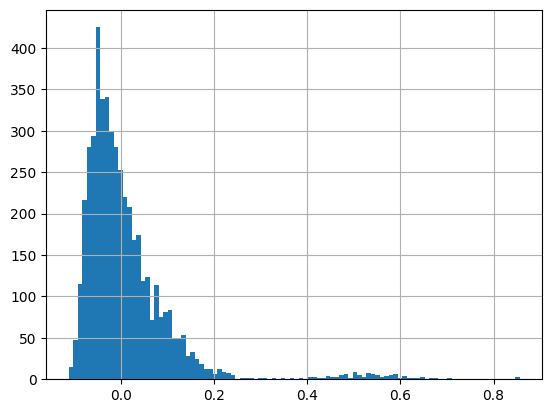

In [36]:
df["reward"].hist(bins=100)

In [37]:

# Normalize to [0.1, 1.0] range (or any positive range you like)
min_r = df["reward"].min()
max_r = df["reward"].max()

# Avoid zero reward
scaled_rewards = 0.1 + 0.9 * (df["reward"] - min_r) / (max_r - min_r)
df["shift_reward"] = scaled_rewards

<Axes: >

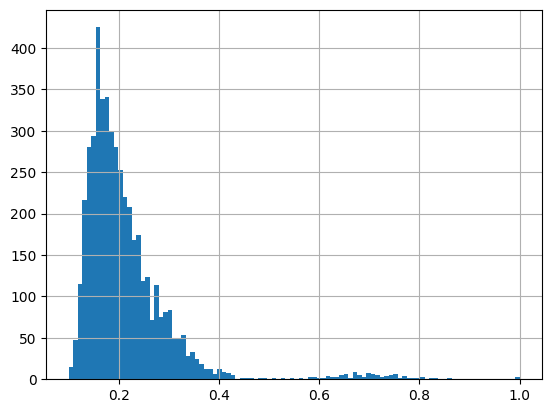

In [38]:
df["shift_reward"].hist(bins=100)

In [39]:
df[df["shift_reward"]==1]

,nonStereoSMILES,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,apricot,...,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody,reward,shift_reward
4203,CCOc1ccc(C(OCC)OCC)cc1OC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.855641,1.0
4400,COc1cc(C=O)ccc1OC1OC(CO)C(O)C(O)C1O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.855641,1.0
4757,CCOC1OC(CO)C(O)C(O)C1O.COc1cc(C=O)ccc1O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.855641,1.0


In [40]:
df[df["reward"]==1]

,nonStereoSMILES,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,apricot,...,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody,reward,shift_reward


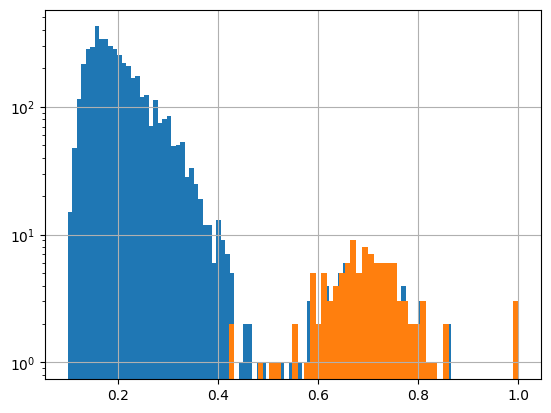

In [41]:

df["shift_reward"].hist(bins=100)
df[df["vanilla"]==1]["shift_reward"].hist(bins=50)
plt.yscale("log")

<Axes: >

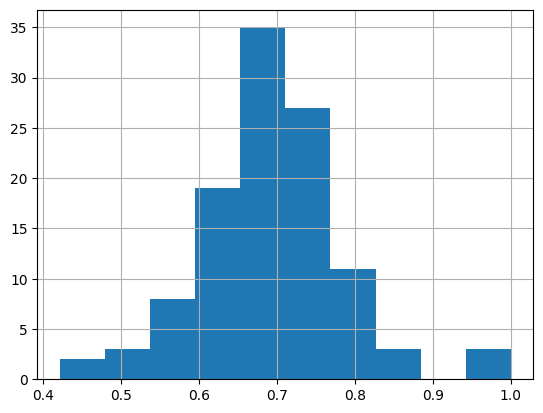

In [42]:
df[df["vanilla"]==1]["shift_reward"].hist(bins=10)

<Axes: >

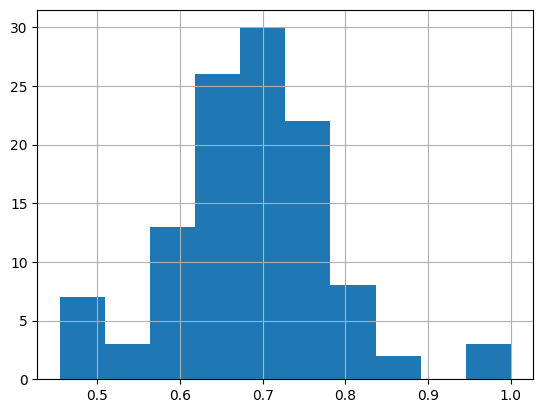

In [43]:
df[df["shift_reward"]>0.45]["shift_reward"].hist(bins=10)

In [44]:
df["shift_reward_2"] = df["shift_reward"]**2

<Axes: >

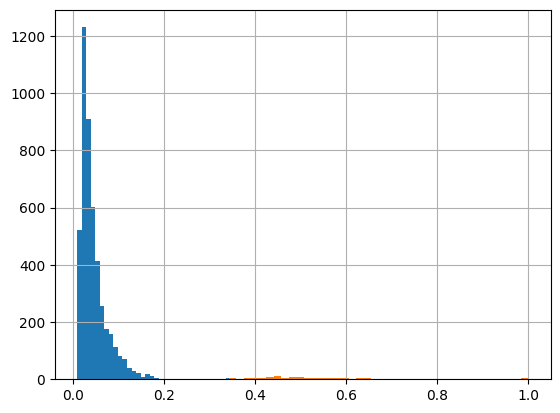

In [45]:


df["shift_reward_2"].hist(bins=100)
df[df["vanilla"]==1]["shift_reward_2"].hist(bins=50)

In [46]:
df = pd.read_csv("openpomdata.csv").drop("descriptors",axis=1)
len(df)

4983

In [47]:
atoms_in_dataset = set()

for smiles in df["nonStereoSMILES"]:  # or your SMILES column
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        atoms_in_dataset.update(atom.GetSymbol() for atom in mol.GetAtoms())
atoms_in_dataset

{'Al',
 'B',
 'Bi',
 'Br',
 'C',
 'Ca',
 'Cl',
 'Co',
 'Cr',
 'Cu',
 'F',
 'Fe',
 'He',
 'I',
 'K',
 'Mg',
 'N',
 'Na',
 'O',
 'P',
 'S',
 'Si',
 'Ti',
 'V',
 'Zn'}

In [48]:


atoms_in_dataset = set()

for smiles in df[df["vanilla"]==1]["nonStereoSMILES"]:  # or your SMILES column
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        atoms_in_dataset.update(atom.GetSymbol() for atom in mol.GetAtoms())
atoms_in_dataset

{'C', 'N', 'O', 'S'}

In [49]:

df = df[df["nonStereoSMILES"].apply(explicit_H_filter)].copy()  
df = df.reset_index(drop=True)
df.head()

,nonStereoSMILES,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,apricot,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [50]:
atoms_in_dataset = set()

for smiles in df["nonStereoSMILES"]:  # or your SMILES column
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        atoms_in_dataset.update(atom.GetSymbol() for atom in mol.GetAtoms())

In [51]:
len(atoms_in_dataset)

25